# Praca domowa nr 8

- Dane to tej pracy domowej to lista top 5000 albumów muzycznych wg portalu [rateyourmusic.com](https://rateyourmusic.com). Dataset wraz z opisem można znaleźć na [Kaggle'u](https://www.kaggle.com/datasets/michaelbryantds/top-5000-albums-of-all-time-rateyourmusiccom). 
- Dane znajdują się też w katalogu z pracą domową - nazwa pliku to `rym_top5000.csv`.  

## Zadanie 1 - `numpy` + `pandas` (2 pkt)
Używając funkcji z pakietów `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o albumach muzycznych.

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("rym_top5000.csv")

In [6]:
df = df.rename(columns = {"Average Rating":"avg_rating"})
df["Number of Ratings"] = df["Number of Ratings"].transform(lambda x: int(x.replace(',', '')))
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,avg_rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,70382,1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,48662,983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,44943,870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,58590,734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,44206,379


#### Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów? Podaj top 10.

In [7]:
x = df.groupby("Artist Name")\
    .size().reset_index()\
    .rename(columns = {0: "Albums"})
x = x.loc[x.Albums >= 5]

y = df.groupby("Artist Name")\
    .avg_rating.agg("median")\
    .reset_index()\
    .rename(columns = {"avg_rating":"Median"})

res1 = y.merge(x, on = "Artist Name")\
    .sort_values("Median", ascending = False)\
    .head(10)\
    .reset_index(drop = True)

res1

,Artist Name,Median,Albums
0,David Bowie,4.050,8
1,The Beatles,4.045,10
2,Neil Young,4.000,5
3,King Crimson,3.970,7
4,The Rolling Stones,3.965,6
5,Black Sabbath,3.950,8
6,Genesis,3.950,5
7,Led Zeppelin,3.940,6
8,Angelo Badalamenti,3.920,5
9,Stevie Wonder,3.910,5


#### Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? Podaj top 10  oraz najwyższą i najniższą ocenę dla każdego z tych artystów. 

In [8]:
res2 = df.groupby("Artist Name")\
    .apply(lambda x: 
           pd.Series(
               [abs(max(x.avg_rating) - min(x.avg_rating)), max(x.avg_rating), min(x.avg_rating)],
               index=["Difference", "Max", "Min"])
          )\
    .sort_values("Difference", ascending = False).reset_index().head(10)

res2

,Artist Name,Difference,Max,Min
0,Kendrick Lamar,0.75,4.27,3.52
1,The Beatles,0.70,4.25,3.55
2,Pink Floyd,0.69,4.29,3.60
3,My Bloody Valentine,0.66,4.24,3.58
4,King Crimson,0.63,4.30,3.67
5,John Coltrane,0.60,4.30,3.70
6,Radiohead,0.57,4.23,3.66
7,Miles Davis,0.54,4.23,3.69
8,The Cure,0.54,4.17,3.63
9,Kanye West,0.53,4.07,3.54


#### Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Weź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.

In [9]:
res3 = df.loc[(df["Number of Reviews"] > 15) & (df["Number of Ratings"] > 5000)]\
    .assign(Ratio = df["Number of Ratings"]/df["Number of Reviews"])\
    .sort_values("Ratio", ascending = False)\
    .reset_index(drop = True)\
    .head(10)
res3

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,avg_rating,Number of Ratings,Number of Reviews,Ratio
0,354.0,Jenny Death: The Powers That B Disc 2,Death Grips,19 March 2015,"Experimental Hip Hop, Noise Rock, Industrial H...","noisy, abstract, aggressive, male vocals, mani...",3.90,10855,30,361.833333
1,1696.0,Bury Me at Makeout Creek,Mitski,11 November 2014,"Indie Rock, Singer/Songwriter","lonely, anxious, passionate, suicide, raw, fem...",3.77,5856,19,308.210526
2,3734.0,春と修羅 (Haru to Shura),春ねむり [Haru Nemuri],11 April 2018,"Noise Pop, J-Rock, J-Pop","female vocals, energetic, passionate, rhythmic...",3.67,6277,23,272.913043
3,4950.0,Saturation,Brockhampton,9 June 2017,"Pop Rap, West Coast Hip Hop","eclectic, boastful, male vocals, LGBT, vulgar,...",3.55,17629,70,251.842857
4,1037.0,Saturation III,Brockhampton,15 December 2017,"Pop Rap, West Coast Hip Hop","quirky, male vocals, introspective, LGBT, boas...",3.74,17118,68,251.735294
5,2490.0,Scenery,福居良 [Ryo Fukui],1976,Hard Bop,"instrumental, playful, warm, summer, happy, me...",3.73,5968,24,248.666667
6,644.0,Endless,Frank Ocean,9 April 2018,"Ambient Pop, Alternative R&B, Art Pop","atmospheric, ethereal, mellow, male vocals, me...",3.85,8911,39,228.487179
7,2870.0,Imperial,Denzel Curry,9 March 2016,"Southern Hip Hop, Trap","angry, political, aggressive, crime, urban, dr...",3.66,11271,50,225.420000
8,951.0,Saturation II,Brockhampton,25 August 2017,"Pop Rap, West Coast Hip Hop","LGBT, boastful, summer, male vocals, playful, ...",3.74,18322,85,215.552941
9,440.0,Bottomless Pit,Death Grips,6 May 2016,"Industrial Hip Hop, Abstract Hip Hop, Experime...","aggressive, chaotic, noisy, manic, energetic, ...",3.82,20614,102,202.098039


### Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających? 
a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl).

b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).


In [10]:
res4a = df.loc[df["Number of Reviews"] > df["Number of Reviews"].quantile(0.75)]\
    .assign(Year = df["Release Date"].str[-4:])\
    .groupby("Year")\
    .size()\
    .reset_index()\
    .rename(columns = {0: "Albums"})\
    .sort_values("Albums", ascending = False)\
    .reset_index(drop = True)\
    .head(5)

res4a

,Year,Albums
0,1970,43
1,1971,41
2,1969,38
3,1994,36
4,1995,34


In [11]:
res4b = df.loc[df["Number of Ratings"] > df["Number of Reviews"].quantile(0.75)]\
    .assign(Year = df["Release Date"].str[-4:])\
    .groupby("Year")\
    .size()\
    .reset_index()\
    .rename(columns = {0: "Albums"})\
    .sort_values("Albums", ascending = False)\
    .reset_index(drop = True)\
    .head(5)
res4b

,Year,Albums
0,1971,160
1,1973,159
2,1972,144
3,1970,142
4,1994,135


## Zadanie 2 - wizualizacja (3 pkt)
- Za pomocą pakietów `matplotlib` i `seaborn` stwórz dwa wykresy. 
- Wykorzystaj funkcję `matplotlib.pyplot.subplots`, by umieścić je we wspólnej figurze. 
- Jeden z wykresów ma opierać się na wynikach z zadania 1 - wizualizować odpowiedź na wybrane pytanie. 
- Drugi wykres może mieć dowolną tematykę, ale ma być powiązany z wcześniejszym, tak by figura mogła mieć wspólny tytuł.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize': (12,7)})
sns.set_style("darkgrid")
pd.options.display.max_rows = 10
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

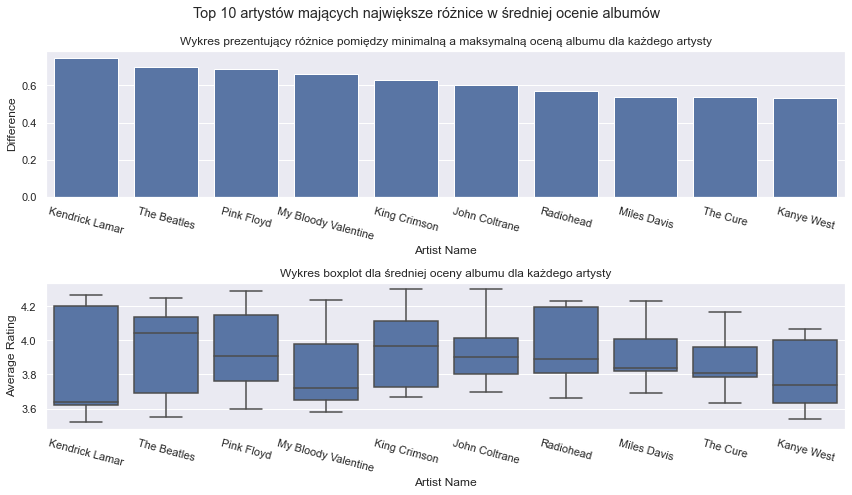

In [17]:
fig, axes = plt.subplots(2,1)
sns.barplot(ax = axes[0], data = res2, x = res2["Artist Name"], y = res2["Difference"], color='b')\
    .set_xticklabels(labels = res2["Artist Name"], rotation = -15)

y = df.merge(res2, on = "Artist Name")\
    .sort_values("Difference", ascending = False)\
    .rename(columns = {"avg_rating":"Average Rating"})
sns.boxplot(ax = axes[1], data = y, x = 'Artist Name', y = 'Average Rating', color = 'b')\
    .set_xticklabels(labels = res2["Artist Name"], rotation = -15)
axes[0].set_title('Wykres prezentujący różnice pomiędzy minimalną a maksymalną oceną albumu dla każdego artysty')
axes[1].set_title('Wykres boxplot dla średniej oceny albumu dla każdego artysty')

fig.suptitle('Top 10 artystów mających największe różnice w średniej ocenie albumów')
fig.tight_layout()

plt.show()

## * Zadanie 3 - bonusowe (1 pkt)

Zapisz wygenerowaną figurę do formatu `.pgf` i załącz w raporcie wygenerowanym w `LaTeX` tak, by na wykresie zawierał się klikalny link do strony `www.rateyourmusic.com` (np. w tytule) - można zrobić to ręcznie, edytując zapisany plik `.pgf`. Przykład w katalogu z pracą domową w pliku `pgf_example.pdf` (klikalny tytuł i elementy legendy).  

Załącz w rozwiązaniu wygenerowany plik `pdf`. 